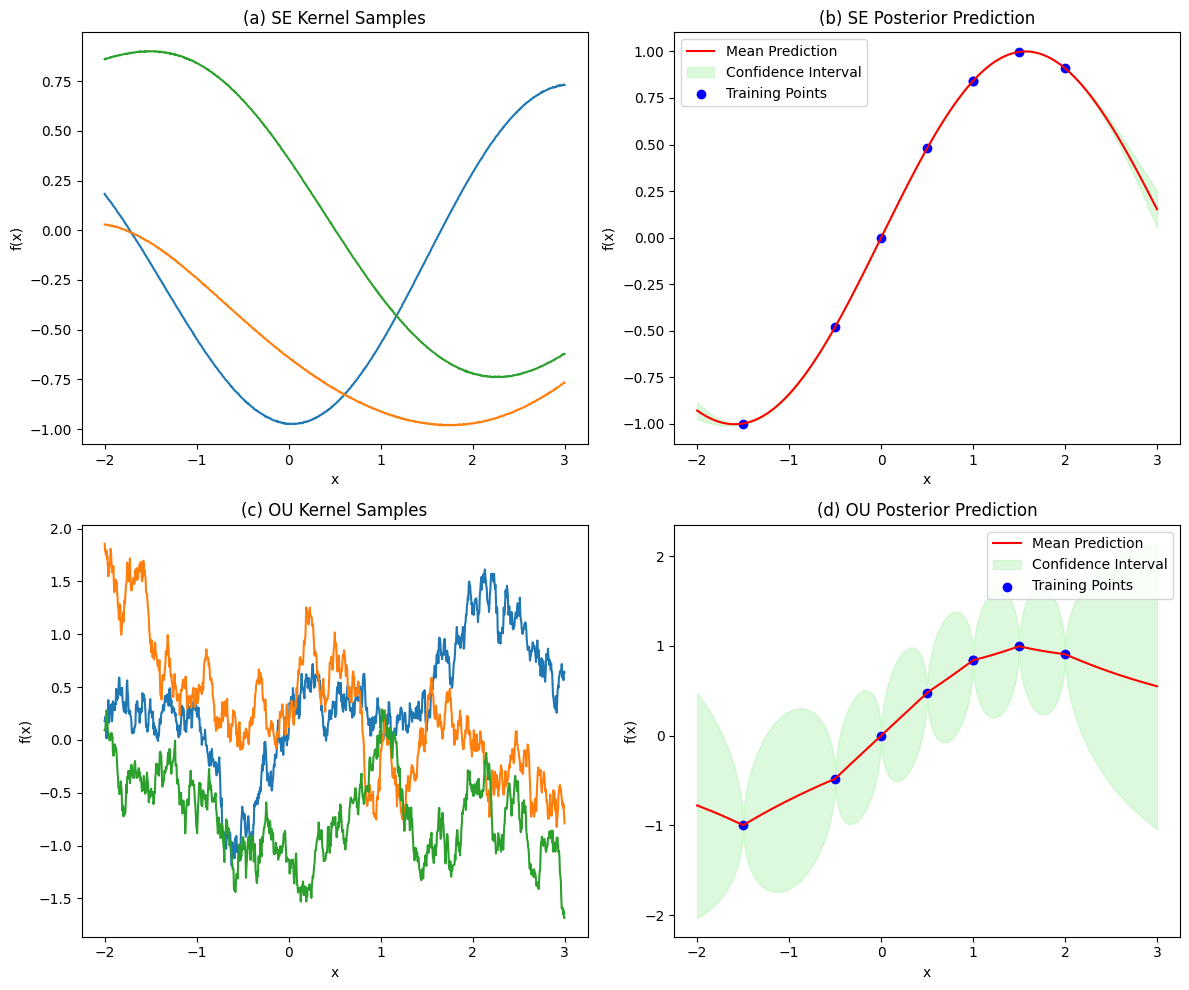

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Squared Exponential (SE) kernel
def se_kernel(x1, x2, length_scale=2):
    return np.exp(-0.5 * (np.subtract.outer(x1, x2) ** 2) / length_scale**2)

# Define the Ornstein-Uhlenbeck (OU) kernel
def ou_kernel(x1, x2, length_scale=2):
    return np.exp(-np.abs(np.subtract.outer(x1, x2)) / length_scale)

# Generate samples from a Gaussian Process prior
def sample_gp(kernel, x, num_samples=3):
    K = kernel(x, x)
    L = np.linalg.cholesky(K + 1e-6 * np.eye(len(x)))  # Add jitter for numerical stability
    return np.dot(L, np.random.randn(len(x), num_samples))

# Generate posterior mean and covariance
def gp_posterior(kernel, x_train, y_train, x_pred):
    K = kernel(x_train, x_train)
    K_s = kernel(x_train, x_pred)
    K_ss = kernel(x_pred, x_pred)
    K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(x_train)))

    # Posterior mean and covariance
    mu_pred = K_s.T @ K_inv @ y_train
    cov_pred = K_ss - K_s.T @ K_inv @ K_s
    return mu_pred, cov_pred

# Input space
x = np.linspace(-2, 3, 1000)

# (a) SE Kernel Samples
se_samples = sample_gp(se_kernel, x, num_samples=3)

# (c) OU Kernel Samples
ou_samples = sample_gp(ou_kernel, x, num_samples=3)

# Training points
x_train = np.array([-1.5, 1.0, -0.5, 0.0, 0.5, 1.0, 1.5,2.0])
y_train = np.sin(x_train)

# Prediction points
x_pred = np.linspace(-2, 3, 1000)

# (b) SE Posterior Prediction
mu_se, cov_se = gp_posterior(se_kernel, x_train, y_train, x_pred)
std_se = np.sqrt(np.diag(cov_se))

# (d) OU Posterior Prediction
mu_ou, cov_ou = gp_posterior(ou_kernel, x_train, y_train, x_pred)
std_ou = np.sqrt(np.diag(cov_ou))

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# (a) SE Kernel Samples
axs[0, 0].plot(x, se_samples)
axs[0, 0].set_title("(a) SE Kernel Samples")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("f(x)")

# (b) SE Posterior Prediction
axs[0, 1].plot(x_pred, mu_se, 'r-', label="Mean Prediction")
axs[0, 1].fill_between(x_pred, mu_se - 2 * std_se, mu_se + 2 * std_se, color="lightgreen", alpha=0.3, label="Confidence Interval")
axs[0, 1].scatter(x_train, y_train, color="blue", label="Training Points")
axs[0, 1].set_title("(b) SE Posterior Prediction")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("f(x)")
axs[0, 1].legend()

# (c) OU Kernel Samples
axs[1, 0].plot(x, ou_samples)
axs[1, 0].set_title("(c) OU Kernel Samples")
axs[1, 0].set_xlabel("x")
axs[1, 0].set_ylabel("f(x)")

# (d) OU Posterior Prediction
axs[1, 1].plot(x_pred, mu_ou, 'r-', label="Mean Prediction")
axs[1, 1].fill_between(x_pred, mu_ou - 2 * std_ou, mu_ou + 2 * std_ou, color="lightgreen", alpha=0.3, label="Confidence Interval")
axs[1, 1].scatter(x_train, y_train, color="blue", label="Training Points")
axs[1, 1].set_title("(d) OU Posterior Prediction")
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("f(x)")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


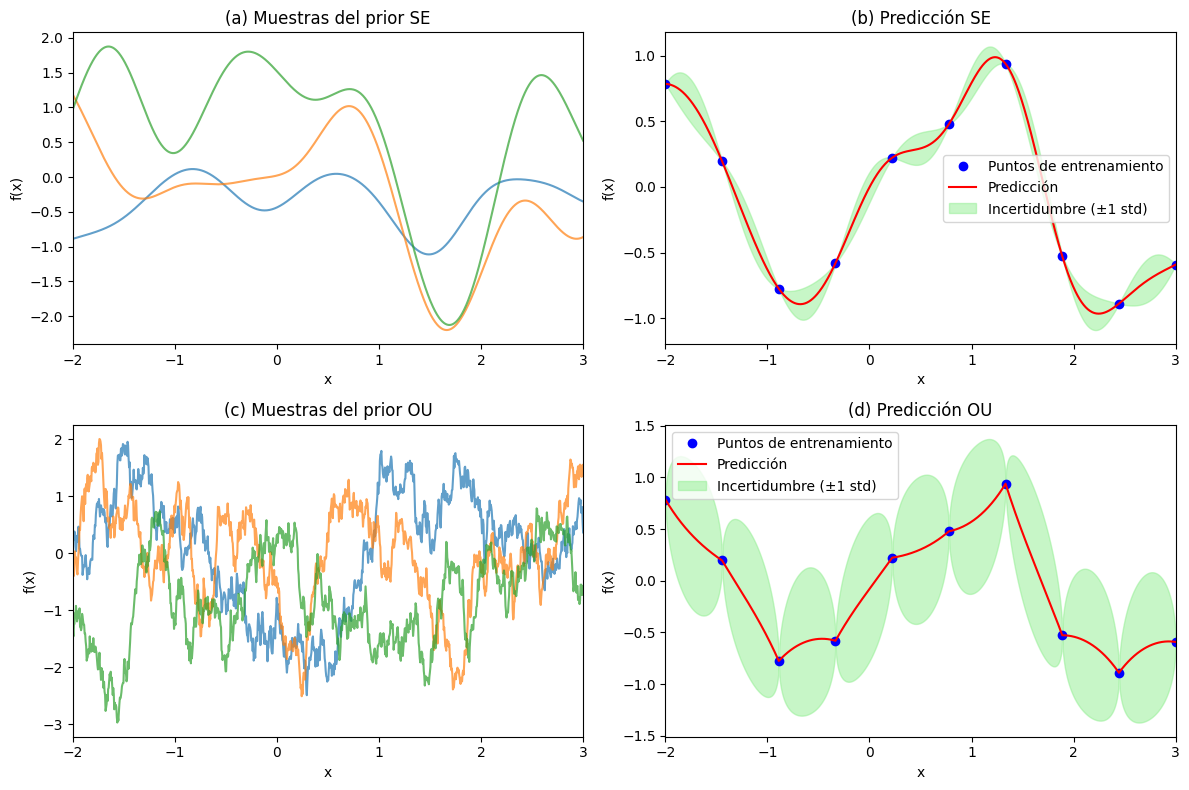

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de covarianza (igual que antes)
def cov_se(x1, x2, l=1.0, sigma_f=1.0):
    dist = np.subtract.outer(x1, x2)
    return sigma_f**2 * np.exp(-dist**2 / (2 * l**2))

def cov_ou(x1, x2, l=1.0, sigma_f=1.0):
    dist = np.abs(np.subtract.outer(x1, x2))
    return sigma_f**2 * np.exp(-dist / l)

# Generar puntos de entrada (test)
X = np.linspace(-2, 3, 1000)

# Parámetros
l = 0.5  # Longitud de escala (puedes modificar este valor)
sigma_f = 1.0
num_train = 10  # Número de puntos de entrenamiento (puedes modificar este valor)

# Generar puntos de entrenamiento
X_train = np.linspace(-2,3,num_train)
y_train = np.sin(X_train*2) + np.random.normal(0, 0.3, len(X_train))

# --- Gráfica (a): Muestras del prior SE (igual que antes) ---
K_se = cov_se(X, X, l=l, sigma_f=sigma_f)
num_samples = 3
samples_se = np.random.multivariate_normal(mean=np.zeros(len(X)), cov=K_se, size=num_samples)

plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura
plt.subplot(2, 2, 1)
for i in range(num_samples):
    plt.plot(X, samples_se[i], alpha=0.7)
plt.title('(a) Muestras del prior SE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2, 3) #Ajustar limites

# --- Gráfica (b): Predicción con kernel SE (con más puntos de entrenamiento) ---
K_se_train = cov_se(X_train, X_train, l=l, sigma_f=sigma_f)
K_se_test_train = cov_se(X, X_train, l=l, sigma_f=sigma_f)
K_se_test = cov_se(X, X, l=l, sigma_f=sigma_f)
K_se_inv = np.linalg.inv(K_se_train + np.eye(len(X_train))*0.0001)

mu = K_se_test_train @ K_se_inv @ y_train
cov = K_se_test - K_se_test_train @ K_se_inv @ K_se_test_train.T
std = np.sqrt(np.diag(cov))

plt.subplot(2, 2, 2)
plt.plot(X_train, y_train, 'bo', label='Puntos de entrenamiento')
plt.plot(X, mu, 'r', label='Predicción')
plt.fill_between(X, mu - std, mu + std, color='lightgreen', alpha=0.5, label='Incertidumbre (±1 std)')
plt.title('(b) Predicción SE')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.xlim(-2, 3) #Ajustar limites

# --- Gráfica (c): Muestras del prior OU (igual que antes) ---
K_ou = cov_ou(X, X, l=l, sigma_f=sigma_f)
samples_ou = np.random.multivariate_normal(mean=np.zeros(len(X)), cov=K_ou, size=num_samples)

plt.subplot(2, 2, 3)
for i in range(num_samples):
    plt.plot(X, samples_ou[i], alpha=0.7)
plt.title('(c) Muestras del prior OU')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2, 3) #Ajustar limites

# --- Gráfica (d): Predicción con kernel OU (con más puntos de entrenamiento) ---
K_ou_train = cov_ou(X_train, X_train, l=l, sigma_f=sigma_f)
K_ou_test_train = cov_ou(X, X_train, l=l, sigma_f=sigma_f)
K_ou_test = cov_ou(X, X, l=l, sigma_f=sigma_f)
K_ou_inv = np.linalg.inv(K_ou_train + np.eye(len(X_train))*0.0001)

mu_ou = K_ou_test_train @ K_ou_inv @ y_train
cov_ou = K_ou_test - K_ou_test_train @ K_ou_inv @ K_ou_test_train.T
std_ou = np.sqrt(np.diag(cov_ou))

plt.subplot(2, 2, 4)
plt.plot(X_train, y_train, 'bo', label='Puntos de entrenamiento')
plt.plot(X, mu_ou, 'r', label='Predicción')
plt.fill_between(X, mu_ou - std_ou, mu_ou + std_ou, color='lightgreen', alpha=0.5, label='Incertidumbre (±1 std)')
plt.title('(d) Predicción OU')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.xlim(-2, 3) #Ajustar limites

plt.tight_layout()
plt.show()